In [41]:
#https://www.kaggle.com/datasets/primaryobjects/voicegender
# Import the following packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

In [42]:
import warnings
warnings.filterwarnings('ignore')
voices = pd.read_csv('voice.csv')
print(voices.shape)
print(voices.head())

(3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812 

In [43]:
voices.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


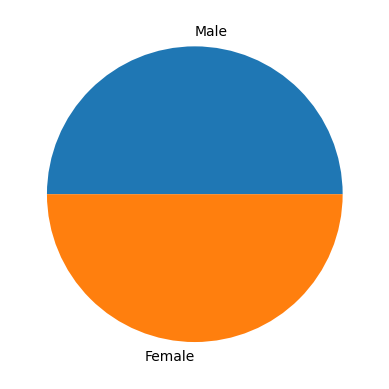

In [44]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([1584, 1584])
mylabels = ["Male", "Female"]

plt.pie(y, labels = mylabels)
plt.show() 

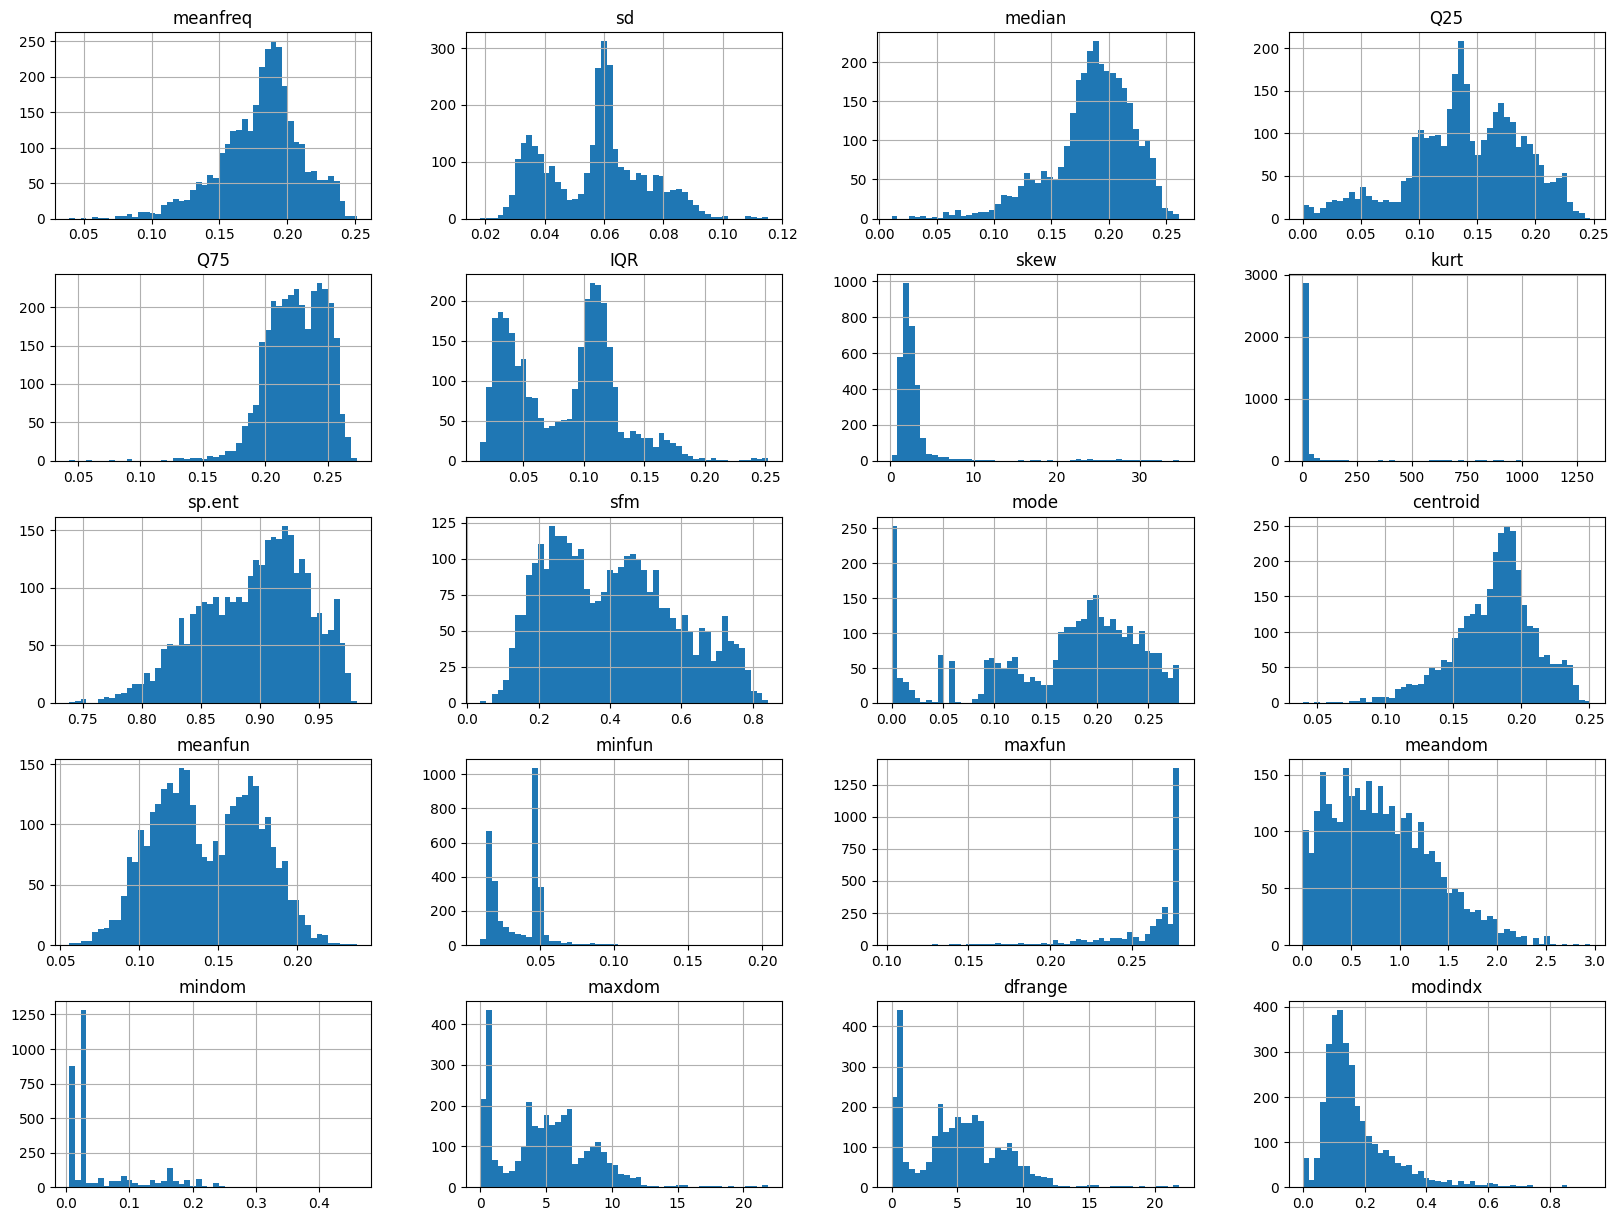

In [45]:
voices.hist(bins=50,figsize=(20,15))
plt.show()

In [46]:
Gender_mapping = {'male':0, 'female':1}
voices = voices.replace({'label':Gender_mapping})

from scipy import stats


'''
min_max_scaler = preprocessing.MinMaxScaler()

#Normalizing all the data within the meanfreq Column
meanfreq = voices[['meanfreq']].values
meanfreq_scaled = min_max_scaler.fit_transform(meanfreq)
voices['meanfreq'] = pd.DataFrame(meanfreq_scaled)

#Normalizing all the data within the sd Column
sd = voices[['sd']].values
sd_scaled = min_max_scaler.fit_transform(sd)
voices['sd'] = pd.DataFrame(sd_scaled)

#Normalizing all the data within the median Column
median = voices[['median']].values
median_scaled = min_max_scaler.fit_transform(median)
voices['median'] = pd.DataFrame(median_scaled)

#Normalizing all the data within the Q25 Column
Q25 = voices[['Q25']].values
Q25_scaled = min_max_scaler.fit_transform(Q25)
voices['Q25'] = pd.DataFrame(Q25_scaled)

#Normalizing all the data within the Q75 Column
Q75 = voices[['Q75']].values
Q75_scaled = min_max_scaler.fit_transform(Q75)
voices['Q75'] = pd.DataFrame(Q75_scaled)

#Normalizing all the data within the IQR Column
IQR = voices[['IQR']].values
IQR_scaled = min_max_scaler.fit_transform(IQR)
voices['IQR'] = pd.DataFrame(IQR_scaled)

#Normalizing all the data within the skew Column
skew = voices[['skew']].values
skew_scaled = min_max_scaler.fit_transform(skew)
voices['skew'] = pd.DataFrame(skew_scaled)

#Normalizing all the data within the kurt Column
kurt = voices[['kurt']].values
kurt_scaled = min_max_scaler.fit_transform(kurt)
voices['kurt'] = pd.DataFrame(kurt_scaled)

#Normalizing all the data within the sp.ent Column
spent = voices[['sp.ent']].values
spent_scaled = min_max_scaler.fit_transform(spent)
voices['sp.ent'] = pd.DataFrame(spent_scaled)

#Normalizing all the data within the sfm Column
sfm = voices[['sfm']].values
sfm_scaled = min_max_scaler.fit_transform(sfm)
voices['sfm'] = pd.DataFrame(sfm_scaled)

#Normalizing all the data within the mode Column
mode = voices[['mode']].values
mode_scaled = min_max_scaler.fit_transform(mode)
voices['mode'] = pd.DataFrame(mode_scaled)

#Normalizing all the data within the centroid Column
centroid = voices[['centroid']].values
centroid_scaled = min_max_scaler.fit_transform(centroid)
voices['centroid'] = pd.DataFrame(centroid_scaled)

#Normalizing all the data within the meanfun Column
meanfun = voices[['meanfun']].values
meanfun_scaled = min_max_scaler.fit_transform(meanfun)
voices['meanfun'] = pd.DataFrame(meanfun_scaled)

#Normalizing all the data within the minfun Column
minfun = voices[['minfun']].values
minfun_scaled = min_max_scaler.fit_transform(minfun)
voices['minfun'] = pd.DataFrame(minfun_scaled)

#Normalizing all the data within the maxfun Column
maxfun = voices[['maxfun']].values
maxfun_scaled = min_max_scaler.fit_transform(maxfun)
voices['maxfun'] = pd.DataFrame(maxfun_scaled)

#Normalizing all the data within the meandom Column
meandom = voices[['meandom']].values
meandom_scaled = min_max_scaler.fit_transform(meandom)
voices['meandom'] = pd.DataFrame(meandom_scaled)

#Normalizing all the data within the mindom Column
mindom = voices[['mindom']].values
mindom_scaled = min_max_scaler.fit_transform(mindom)
voices['mindom'] = pd.DataFrame(mindom_scaled)

#Normalizing all the data within the maxdom Column
maxdom = voices[['maxdom']].values
maxdom_scaled = min_max_scaler.fit_transform(maxdom)
voices['maxdom'] = pd.DataFrame(maxdom_scaled)

#Normalizing all the data within the dfrange Column
dfrange = voices[['dfrange']].values
dfrange_scaled = min_max_scaler.fit_transform(dfrange)
voices['dfrange'] = pd.DataFrame(dfrange_scaled)

#Normalizing all the data within the modindx Column
modindx = voices[['modindx']].values
modindx_scaled = min_max_scaler.fit_transform(modindx)
voices['modindx'] = pd.DataFrame(modindx_scaled)
'''

voices = voices.drop(["maxdom","mindom", "dfrange", "meandom", "mode", "maxfun", "minfun", "modindx", "skew","Q75","kurt"],axis = 1)
voices = voices.dropna()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['meanfreq','sd','median','Q25','IQR','sp.ent','sfm','centroid','meanfun']
voices[features] = scaler.fit_transform(voices[features].to_numpy())


print(voices.shape)
print(voices.head())
print(voices.describe())


(3168, 10)
   meanfreq        sd    median       Q25       IQR    sp.ent       sfm  \
0  0.096419  0.473409  0.084125  0.060063  0.254828  0.635798  0.564526   
1  0.125828  0.505075  0.116900  0.077635  0.246961  0.630964  0.591578   
2  0.179222  0.675536  0.102873  0.034284  0.457148  0.442738  0.548382   
3  0.528261  0.554611  0.587559  0.389906  0.407358  0.923261  0.856457   
4  0.452195  0.627209  0.454272  0.317627  0.474474  0.958736  0.926348   

   centroid   meanfun  label  
0  0.096419  0.157706      0  
1  0.125828  0.287642      0  
2  0.179222  0.236945      0  
3  0.528261  0.183442      0  
4  0.452195  0.279190      0  
          meanfreq           sd       median          Q25          IQR  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.668412     0.399987     0.697887     0.567448     0.293484   
std       0.141282     0.171832     0.145295     0.196990     0.180012   
min       0.000000     0.000000     0.000000     0.00000

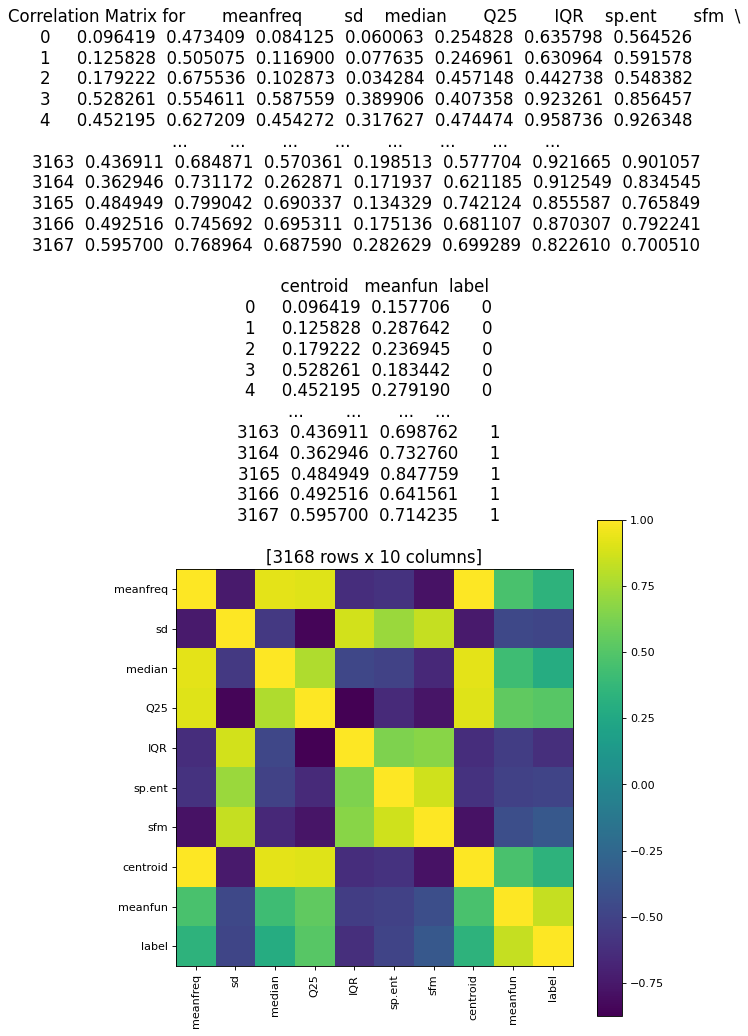

In [47]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
  
plotCorrelationMatrix(voices, 8)

In [48]:
X = voices.drop(['label'],axis=1)
y = voices['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify = y)

# Data normalization
from sklearn.preprocessing import StandardScaler
'''
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifie
from sklearn.tree import DecisionTreeClassifier
# Creating an instance of the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
# Fiting the training data to the model
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [60]:
from sklearn.tree import DecisionTreeClassifier
# Creating an instance of the Decision Tree
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf = 1,min_samples_split = 5,max_depth = 30)
# Fiting the training data to the model
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.962


Confusion matrix, without normalization
[[307  10]
 [ 12 305]]


<Axes: title={'center': 'Confusion matrix for Decision Tree'}, xlabel='Predicted label', ylabel='True label'>

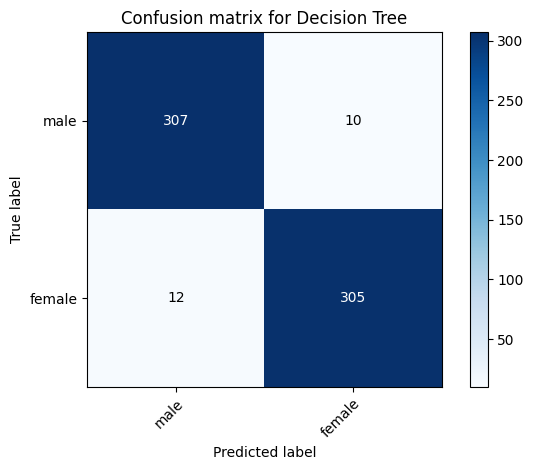

In [61]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify = y)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)

plot_confusion_matrix(y_test, clf_pred, classes=['male','female'],
                      title='Confusion matrix for Decision Tree')

In [51]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_8 <= 0.47
|   |--- feature_4 <= 0.24
|   |   |--- feature_8 <= 0.41
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.41
|   |   |   |--- feature_3 <= 0.56
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.56
|   |   |   |   |--- class: 1
|   |--- feature_4 >  0.24
|   |   |--- feature_8 <= 0.43
|   |   |   |--- feature_4 <= 0.78
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.78
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.43
|   |   |   |--- feature_6 <= 0.61
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.61
|   |   |   |   |--- class: 1
|--- feature_8 >  0.47
|   |--- feature_8 <= 0.51
|   |   |--- feature_4 <= 0.24
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  0.24
|   |   |   |--- feature_6 <= 0.62
| 

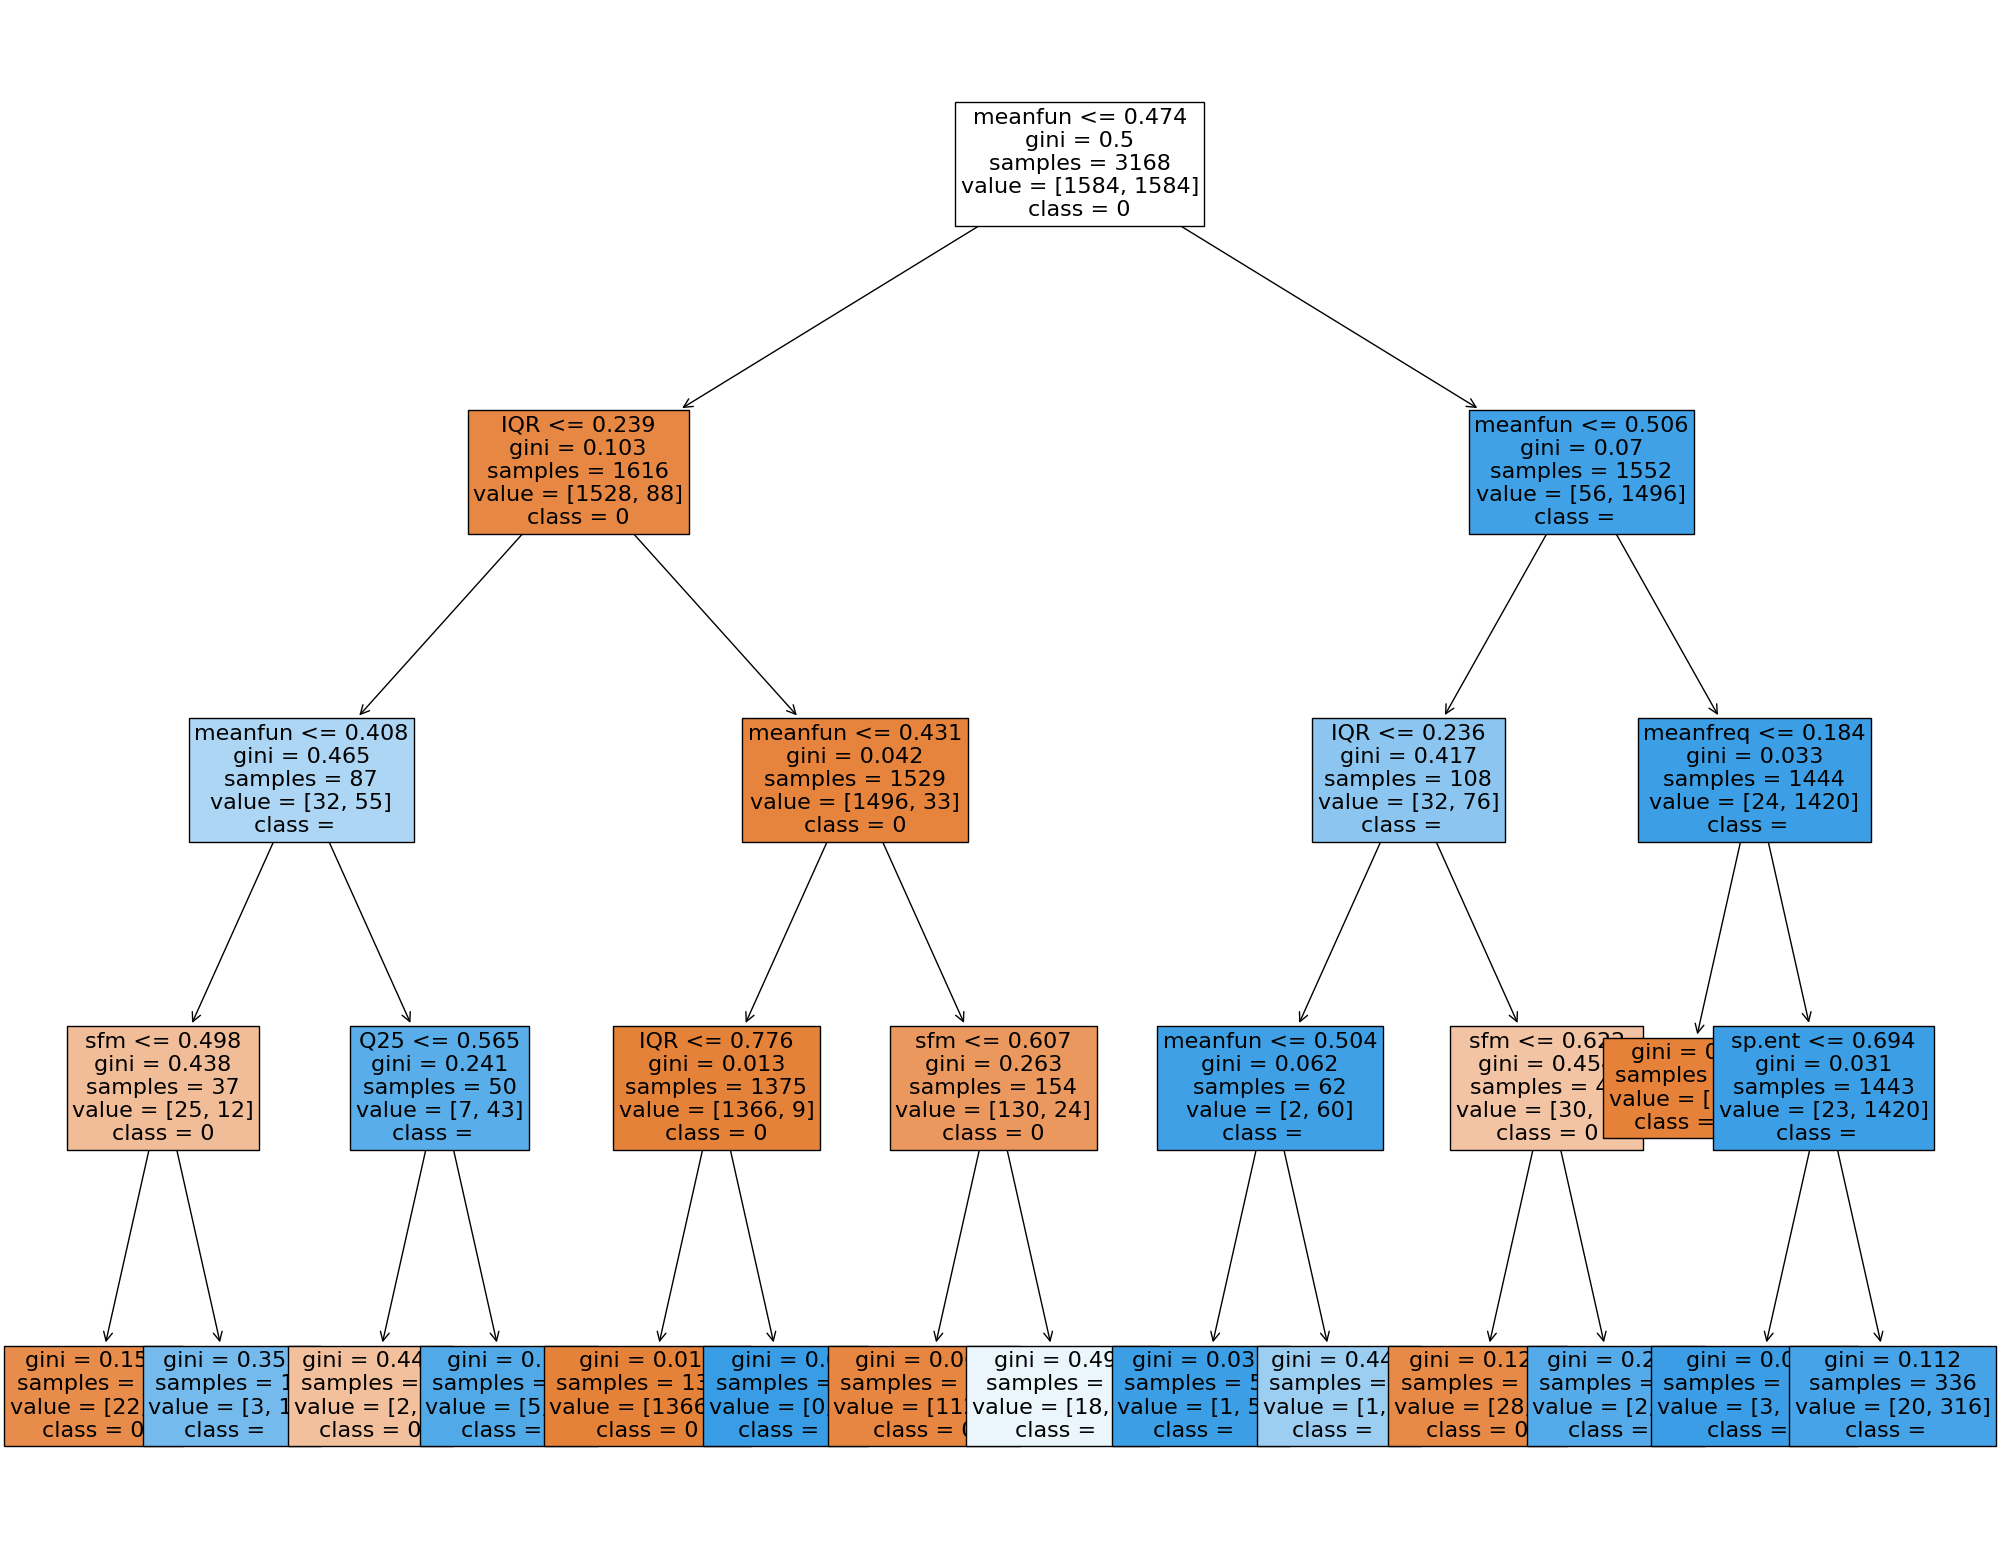

In [52]:
fig = plt.figure(figsize=(25,20))
features = ['meanfreq','sd','median','Q25','IQR','sp.ent','sfm','centroid','meanfun']
tree.plot_tree(clf, filled = True, fontsize = 16, feature_names = features,class_names = str(y))
fig.savefig("C:\\check\\decistion_tree.png")

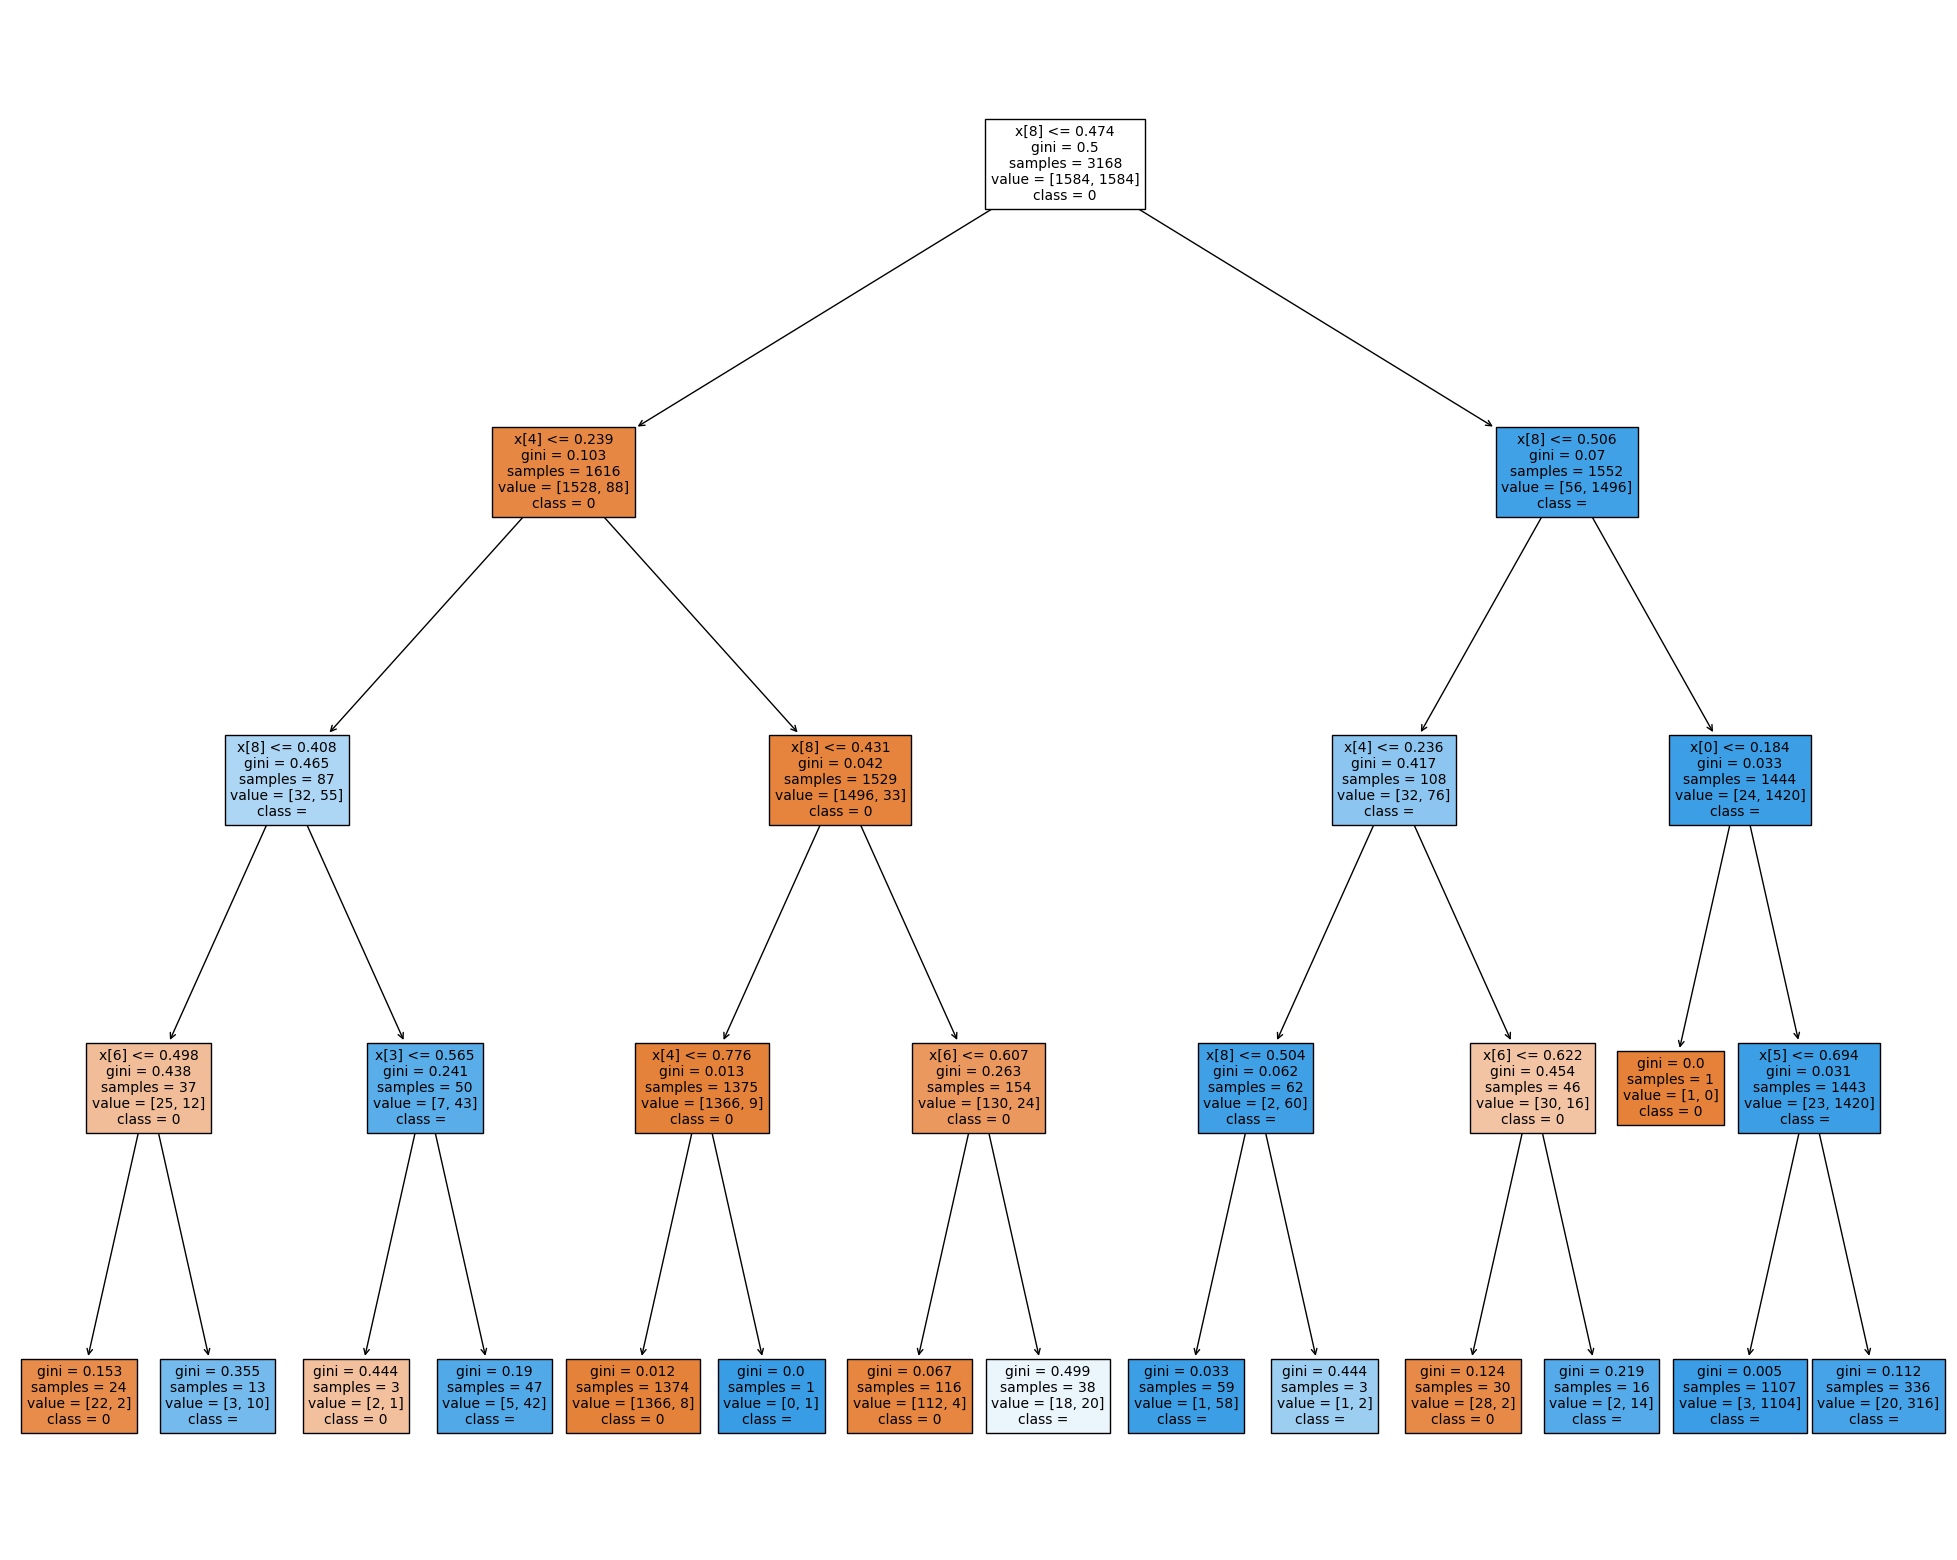

In [53]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled = True, fontsize = 10, class_names = str(y))
fig.savefig("C:\\check\\decistion_treefull.png")

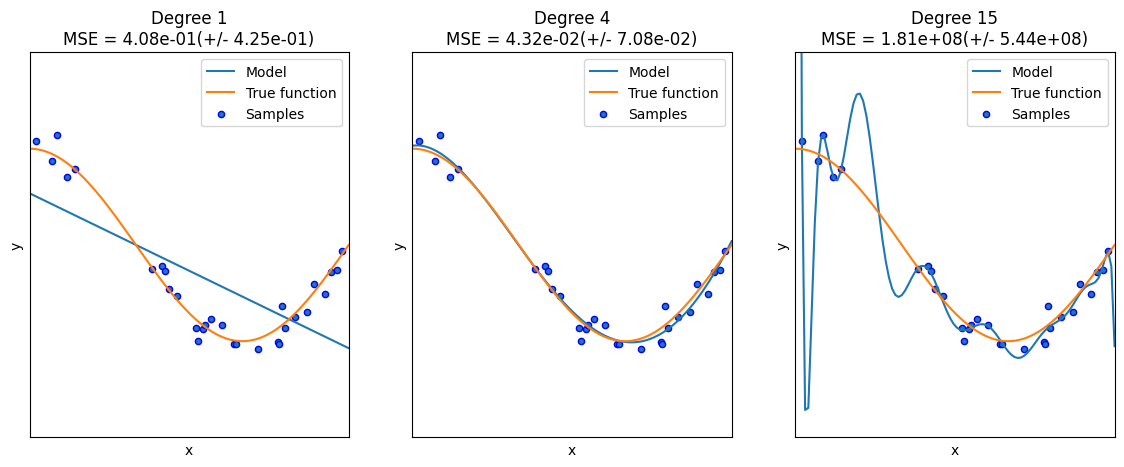

In [ ]:
#Doesn't work for my specific data set
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = voices.drop(['label'],axis=1)
y = voices['label']

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

In [20]:
# Improving the Decision Tree accuracy by increasing the depth.
tree = DecisionTreeClassifier(max_depth=60, random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


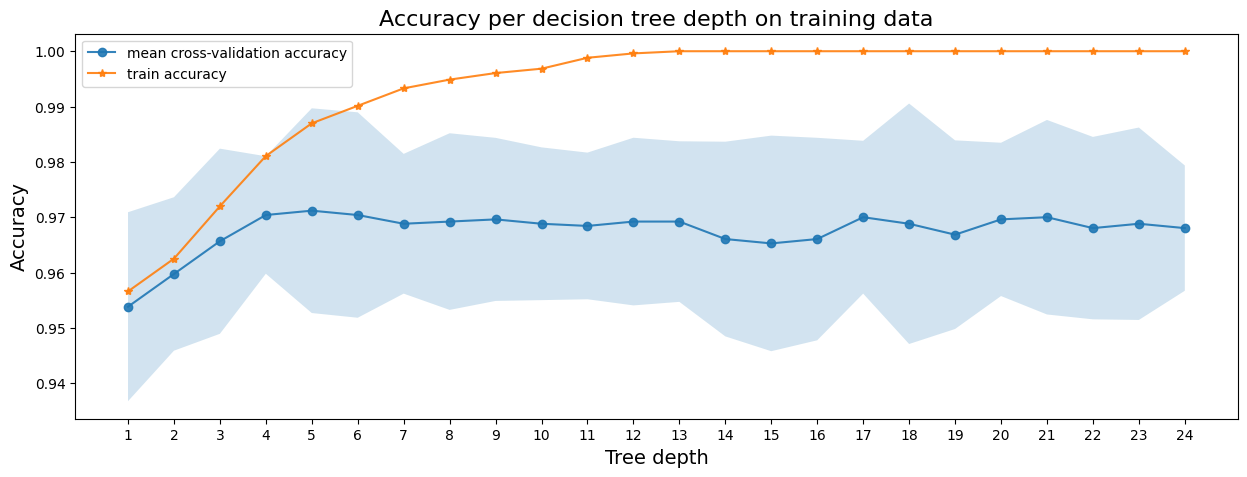

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    #ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-4 tree achieves the best mean cross-validation accuracy 96.64599 +/- 0.63157% on training dataset


In [31]:
# Improving the Decision Tree accuracy by increasing the depth.
tree = DecisionTreeClassifier(random_state=42) #, min_samples_leaf = 1,min_samples_split = 5,max_depth = 4
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [32]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.0109242  0.00969946 0.00158448 0.01471465 0.06543118 0.00157678
 0.03365854 0.         0.8624107 ]


9


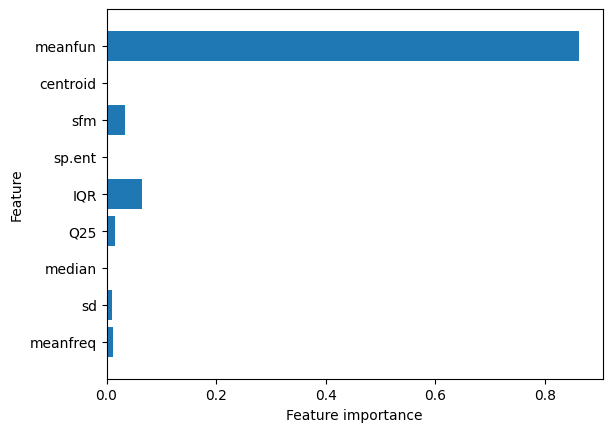

In [33]:
# Creating a function to generate feature importance and plot it.
def plot_feature_importances_dataMoods(model):
  # extractibg the number of predictive feature variables(columns)
  n_features = X.shape[1]
  print(n_features)
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), X)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
# Calling the function to extract feature importance and passing the model named tree
plot_feature_importances_dataMoods(tree)

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClass
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
# StratifiedKFold is a variation of k-fold which returns stratified folds: each set
# contains approximately the same percentage of samples of each target class as the co
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
# number of trees =100, maximum depth = 5
forest = RandomForestClassifier(max_depth=5,n_estimators=100, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.967


Accuracy on training set: 1.000
Accuracy on test set: 0.973
9


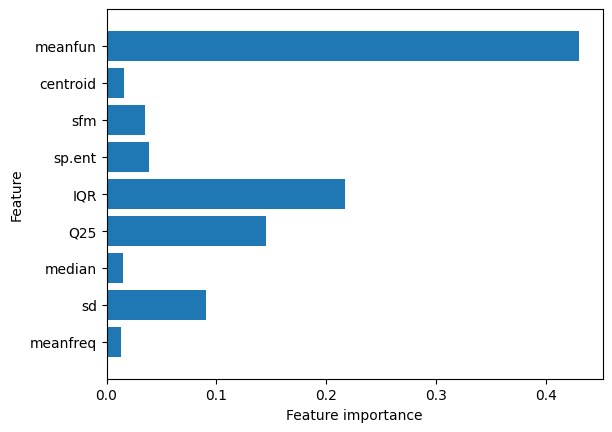

In [30]:
forest = RandomForestClassifier(n_estimators=1400, min_samples_split = 5,min_samples_leaf = 1,max_features = 'sqrt',max_depth = 30,bootstrap = True, random_state=42)
forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
# Calling the function to extract feature importance and passing the model named fores
plot_feature_importances_dataMoods(forest)

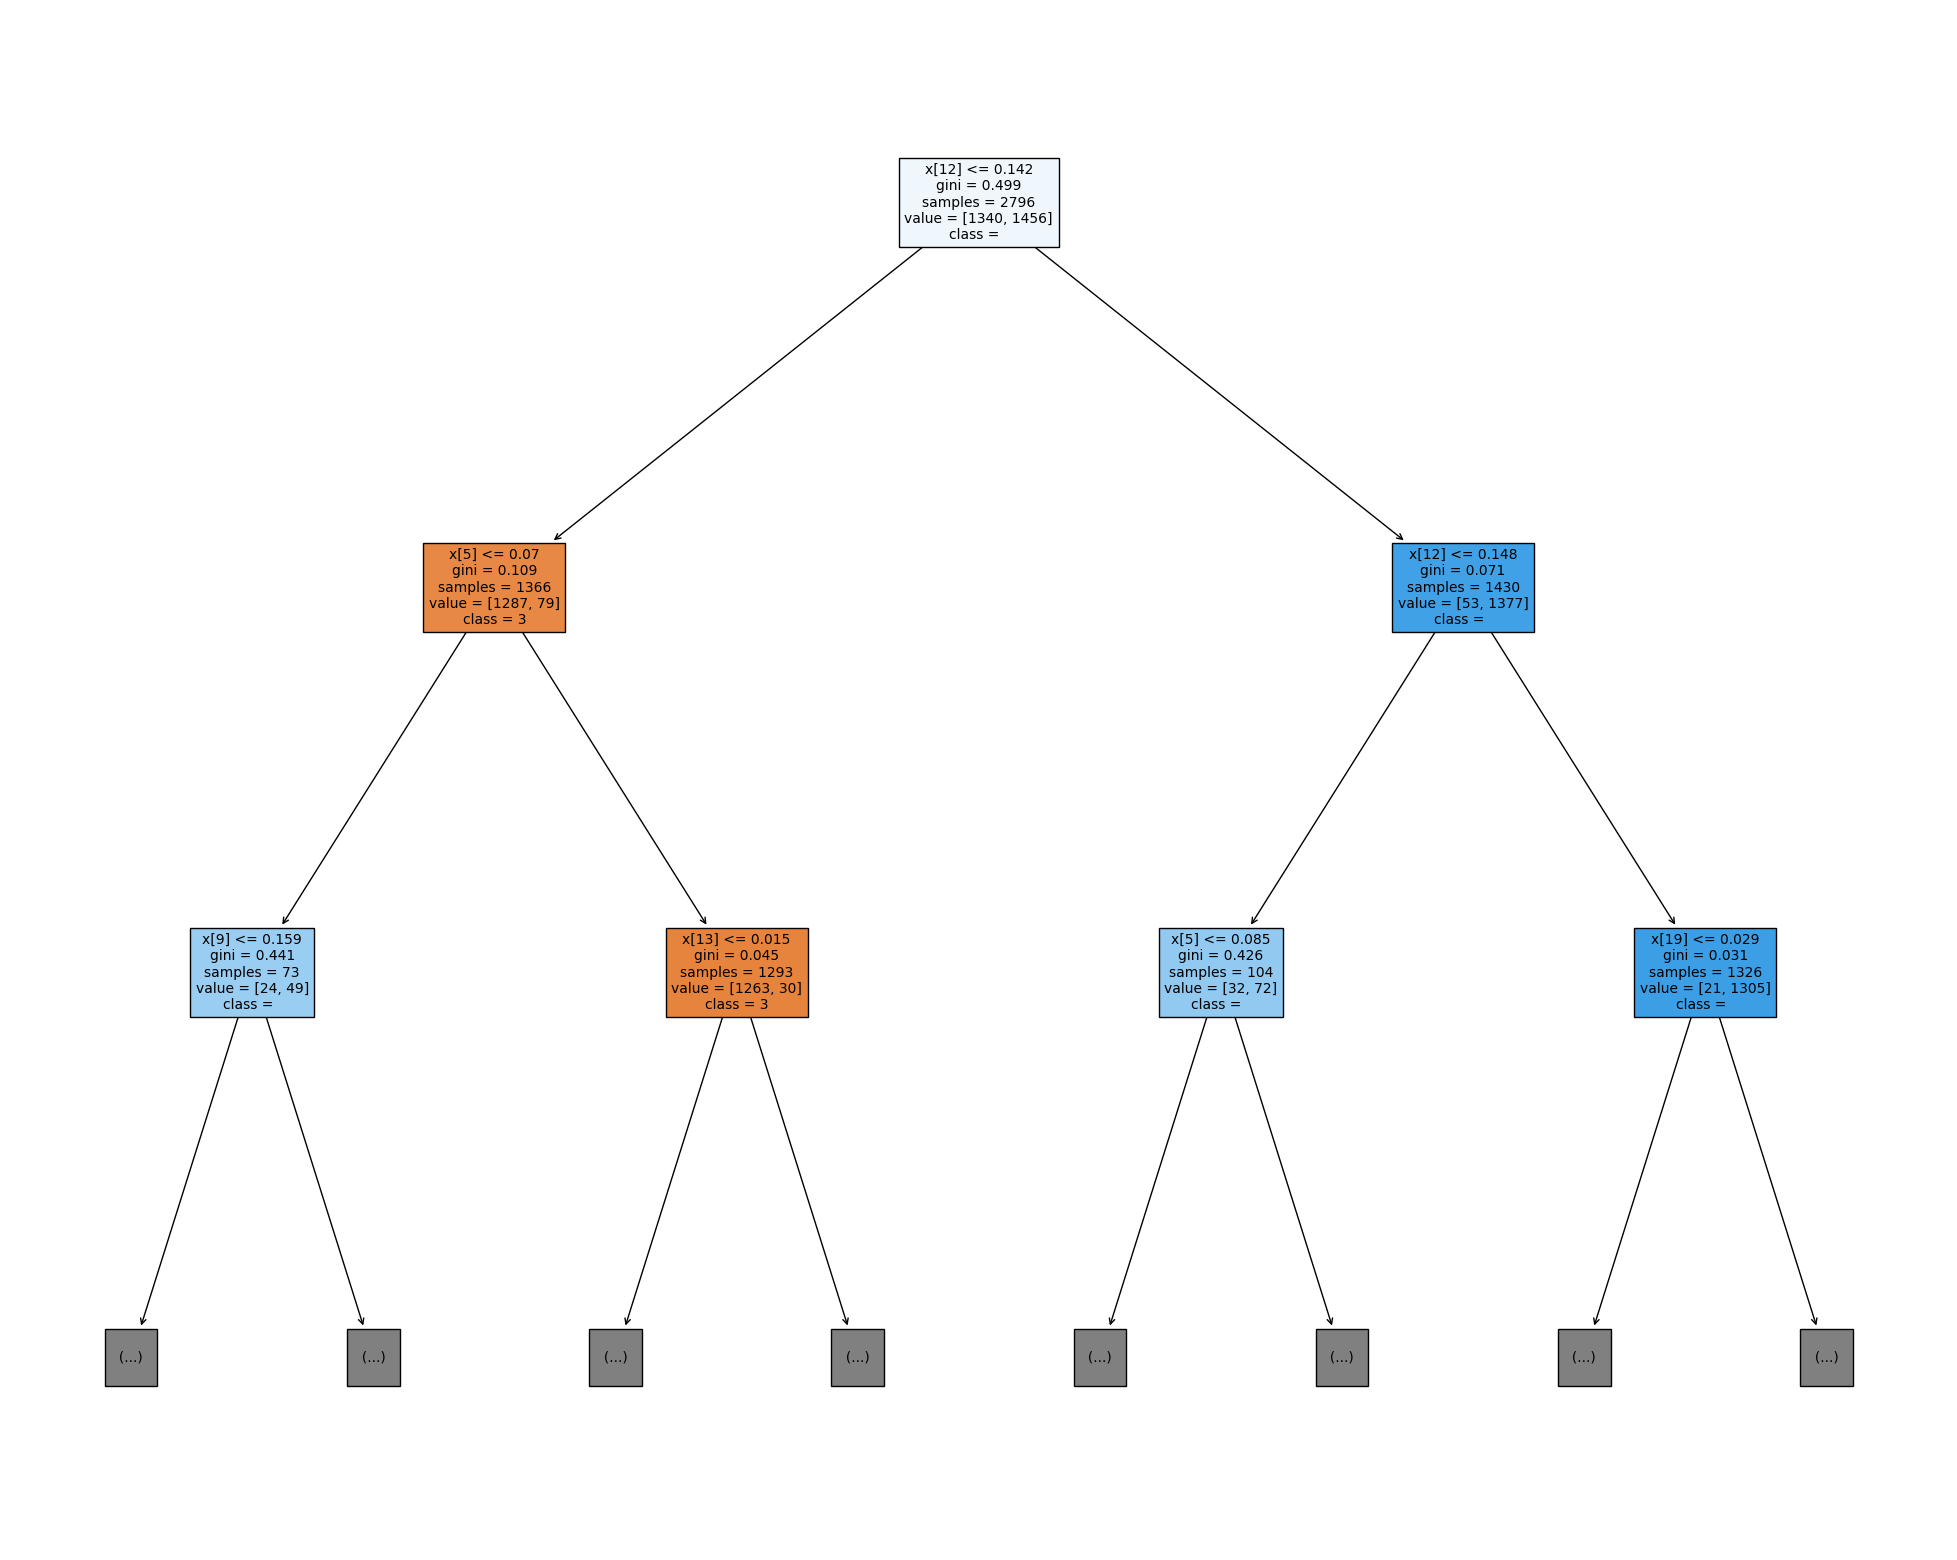

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
forest = DecisionTreeClassifier(random_state=1234)
model = forest.fit(X, y)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, max_depth = 2, filled = True, fontsize = 10, class_names = str(y))
fig.savefig("C:\\check\\decistion_treeForest.png")

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingC
from sklearn.ensemble import GradientBoostingClassifier
# Creating an instance of the Gradient Boosting Classifier and varying parameters.
gbrt = GradientBoostingClassifier(n_estimators=200,max_depth=3,learning_rate=0.03,random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.977


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.969


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.971


20


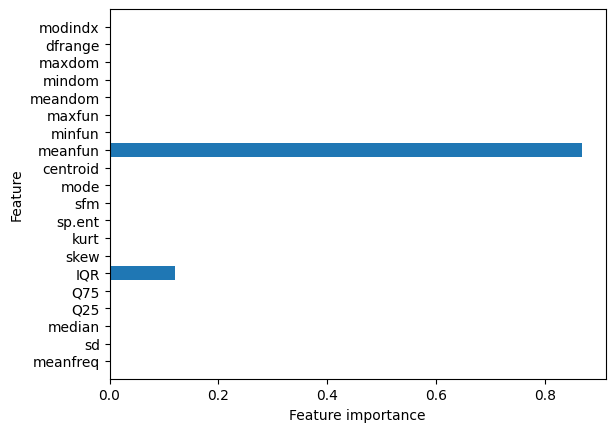

In [ ]:
# Generating variable impotance
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_dataMoods(gbrt)

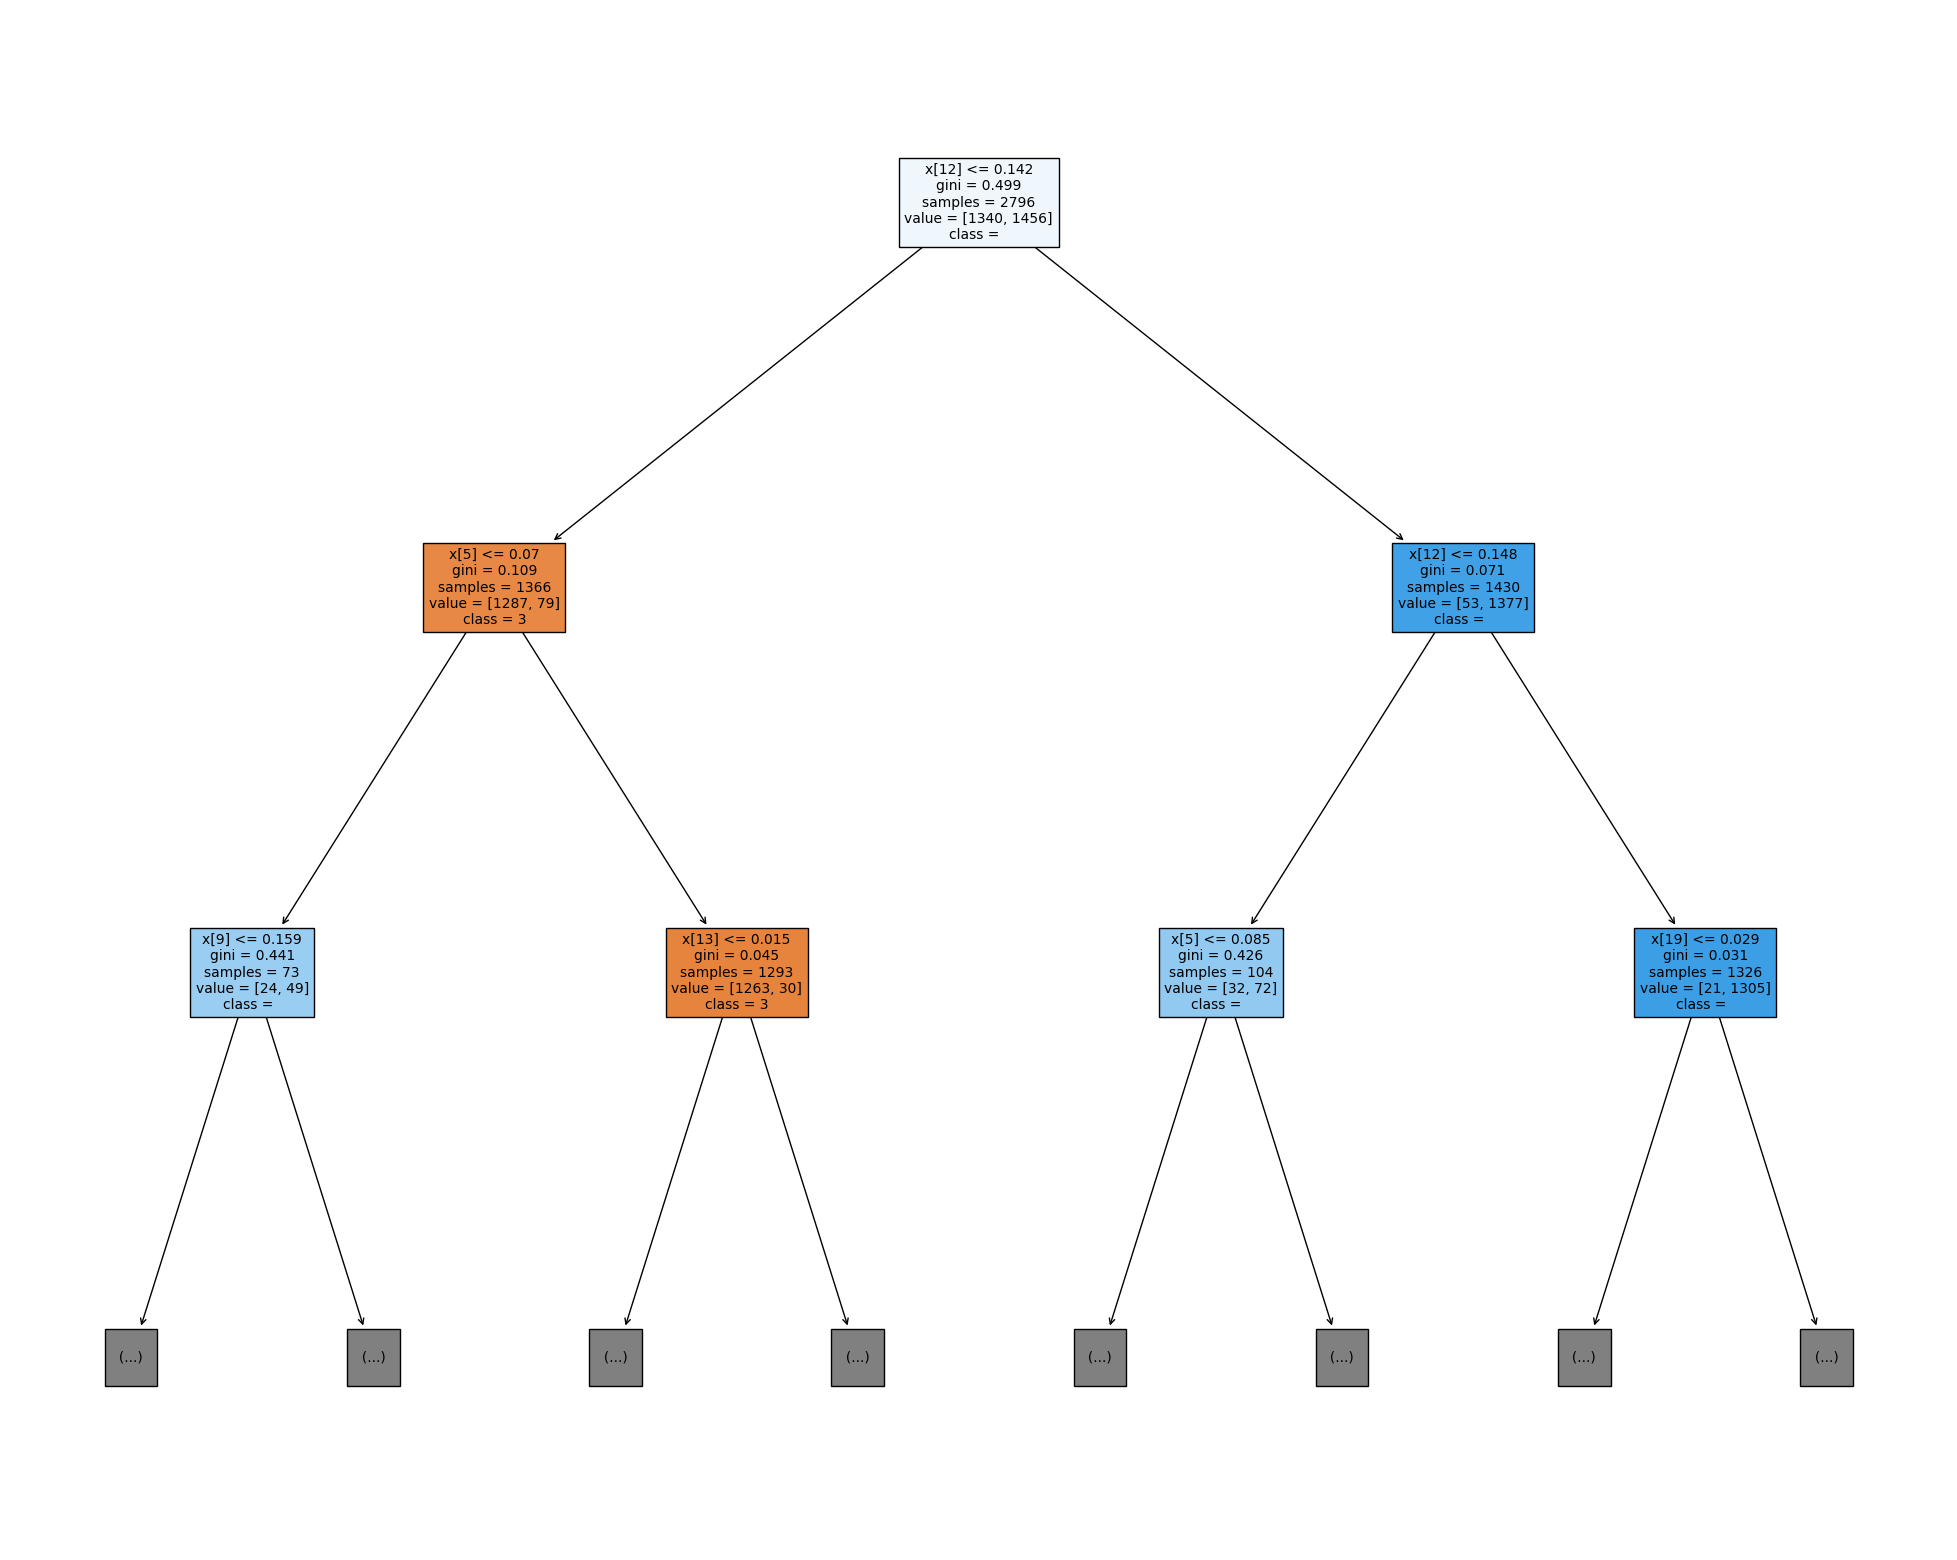

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

gbrt = DecisionTreeClassifier(random_state=1234)
model = gbrt.fit(X, y)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, max_depth = 2, filled = True, fontsize = 10, class_names = str(y))
fig.savefig("C:\\check\\decistion_treeGBRT.png")